In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
print(df.dtypes.unique())

[dtype('int64') dtype('O') dtype('float64')]


In [ ]:
new_df=pd.DataFrame({'name':df.dtypes})

In [ ]:
new_df[new_df['name']=='object']

,name
date,object


In [ ]:
df.drop(['date'], axis=1, inplace=True)

In [ ]:
100*(df.isnull().sum())/(df.shape[0])

,0
id,0.0
price,0.0
bedrooms,0.0
bathrooms,0.0
sqft_living,0.0
sqft_lot,0.0
floors,0.0
waterfront,0.0
view,0.0
condition,0.0


In [ ]:
# EDA
df.corr()['price'].sort_values(ascending=False).drop('price')

,price
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003
waterfront,0.266369


In [ ]:
cor=df.corr()['price'].sort_values(ascending=False).drop('price')

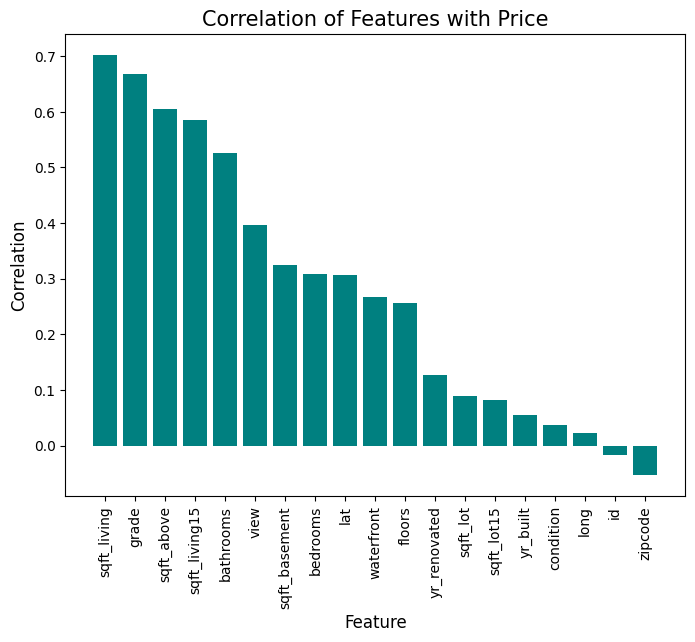

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

In [ ]:

X=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
y=df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
# XGBoost
xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [ ]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
prediction_xgbr=xgbr.predict(X_test)

In [ ]:
print('RMSE_XGBoost Regression=', np.sqrt(metrics.mean_squared_error(y_test,prediction_xgbr)))
print('R2 Score_XGBoost Regression=',metrics.r2_score(y_test,prediction_xgbr))

RMSE_XGBoost Regression= 122779.30710503073
R2 Score_XGBoost Regression= 0.8895067331236677


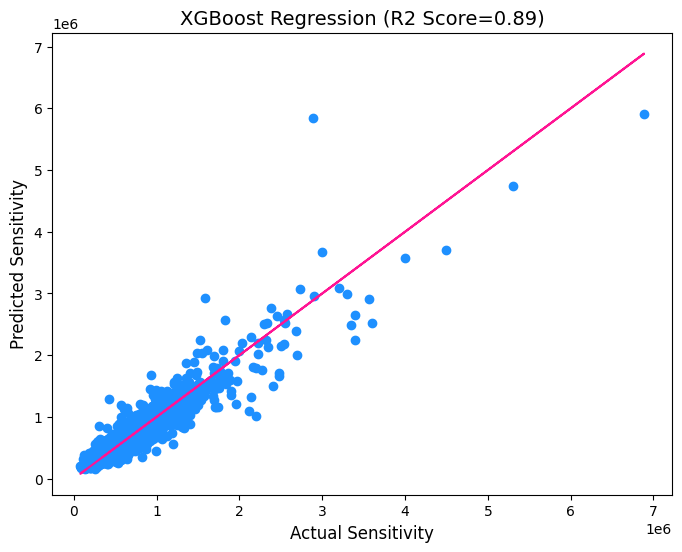

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=prediction_xgbr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('XGBoost Regression (R2 Score=0.89)',fontsize=14)
plt.show()

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions_lr=lr.predict(X_test)

In [ ]:
print('RMSE_Linear Regression=', np.sqrt(metrics.mean_squared_error(y_test,predictions_lr)))
print('R2 Score_Linear Regression=',metrics.r2_score(y_test,predictions_lr))

RMSE_Linear Regression= 200376.79941953736
R2 Score_Linear Regression= 0.7057067312350424


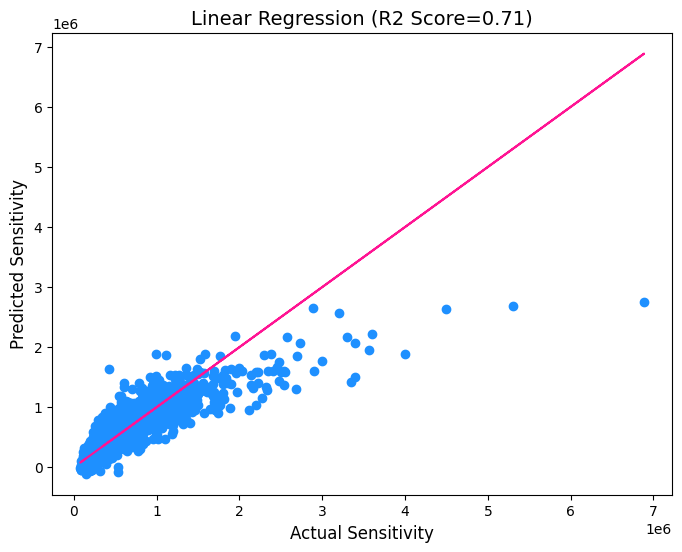

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_lr, color='dodgerblue')
plt.plot(y_test,y_test, color='deeppink')
plt.xlabel('Actual Sensitivity',fontsize=12)
plt.ylabel('Predicted Sensitivity',fontsize=12)
plt.title('Linear Regression (R2 Score=0.71)',fontsize=14)
plt.show()

RMSE_Random Forest = 132278.1372809486
R2 Score_Random Forest = 0.871748752203056


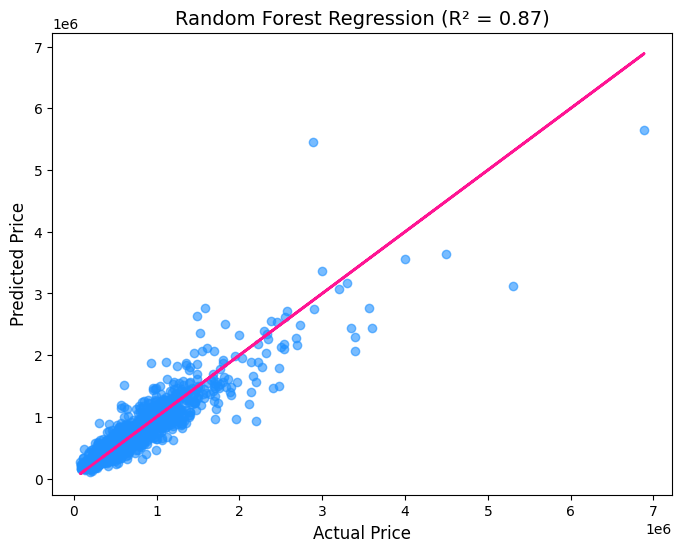

In [ ]:

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=101
)


rf.fit(X_train, y_train)


predictions_rf = rf.predict(X_test)


rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, predictions_rf))
r2_rf   = metrics.r2_score(y_test, predictions_rf)

print('RMSE_Random Forest =', rmse_rf)
print('R2 Score_Random Forest =', r2_rf)


plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_rf, color='dodgerblue', alpha=0.6)
plt.plot(y_test, y_test, color='deeppink', linewidth=2)
plt.xlabel('Actual Price',   fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
plt.title(f'Random Forest Regression (R² = {r2_rf:.2f})', fontsize=14)
plt.show()


RMSE_SVR = 353373.79544396483
R2 Score_SVR = 0.08471964684224453


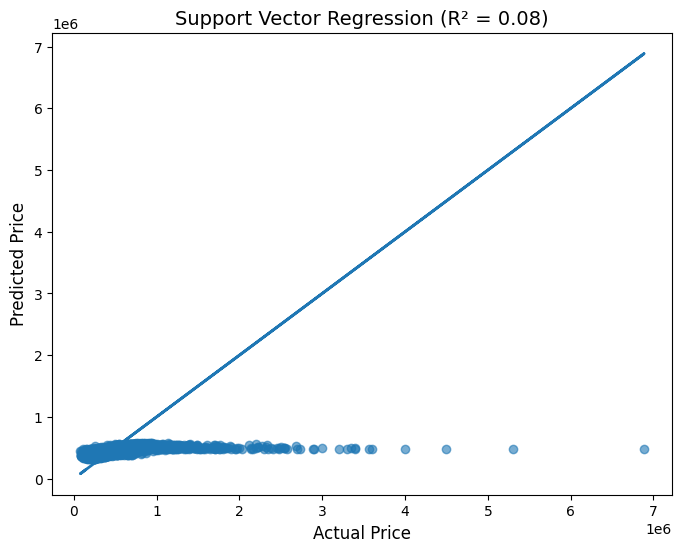

In [ ]:


from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


svr_model = make_pipeline(
    StandardScaler(),
    SVR(
        kernel='rbf',
        C=100,
        gamma=0.1,
        epsilon=0.1
    )
)


svr_model.fit(X_train, y_train)


predictions_svr = svr_model.predict(X_test)


rmse_svr = np.sqrt(metrics.mean_squared_error(y_test, predictions_svr))
r2_svr   = metrics.r2_score(y_test, predictions_svr)

print('RMSE_SVR =', rmse_svr)
print('R2 Score_SVR =', r2_svr)


plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=predictions_svr, alpha=0.6)
plt.plot(y_test, y_test, linewidth=2)
plt.xlabel('Actual Price',   fontsize=12)
plt.ylabel('Predicted Price',fontsize=12)
plt.title(f'Support Vector Regression (R² = {r2_svr:.2f})', fontsize=14)
plt.show()


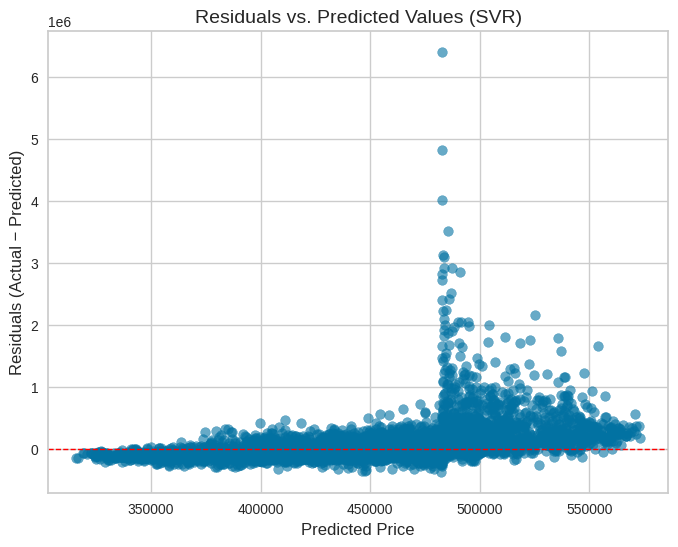

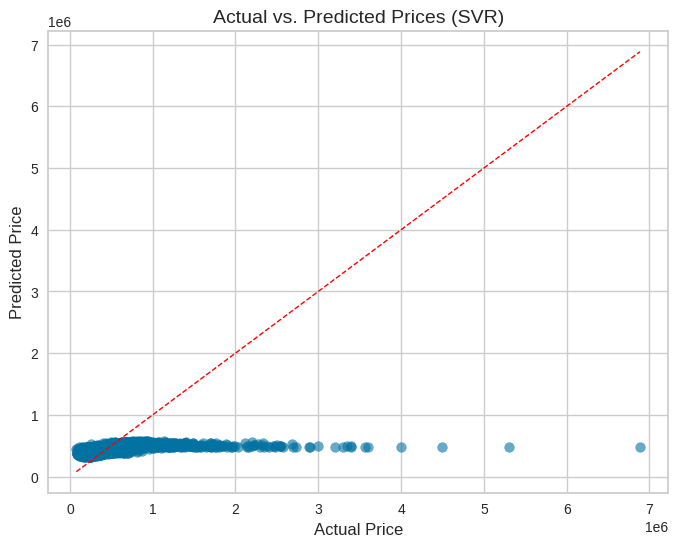

In [ ]:


import matplotlib.pyplot as plt


residuals = y_test - predictions_svr


plt.figure(figsize=(8,6))
plt.scatter(predictions_svr, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Price',   fontsize=12)
plt.ylabel('Residuals (Actual − Predicted)', fontsize=12)
plt.title('Residuals vs. Predicted Values (SVR)', fontsize=14)
plt.grid(True)
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions_svr, alpha=0.6)

min_val = min(y_test.min(), predictions_svr.min())
max_val = max(y_test.max(), predictions_svr.max())
plt.plot([min_val, max_val],
         [min_val, max_val],
         color='red',
         linestyle='--',
         linewidth=1)
plt.xlabel('Actual Price',    fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title('Actual vs. Predicted Prices (SVR)', fontsize=14)
plt.grid(True)
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00
0:	learn: 342707.9938768	test: 345553.3898561	best: 345553.3898561 (0)	total: 54ms	remaining: 27s
100:	learn: 107997.2505022	test: 125425.0215992	best: 125425.0215992 (100)	total: 564ms	remaining: 2.23s
200:	learn: 93362.5652416	test: 119787.5080334	best: 119560.2952468 (193)	total: 1.09s	remaining: 1.62s
300:	learn: 85173.2551271	test: 117435.9536964	best: 117435.9536964 (300)	total: 1.59s	remaining: 1.05s
400:	learn: 79375.0083197	test: 116375.4500345	best: 116369.2508910 (386)	total: 2.13s	remaining: 525ms
499:	learn: 75270.2924951	test: 115194.6318454	best: 115187.9298030 (497)	total: 2.63s	remaining: 0us

bestTest = 115187.9298
bestIteration = 497

Shrink model to first 498 iterations.
RMSE_CatBoost = 115187.92980295351
R2 Score_CatBoost = 0.9027478068248409


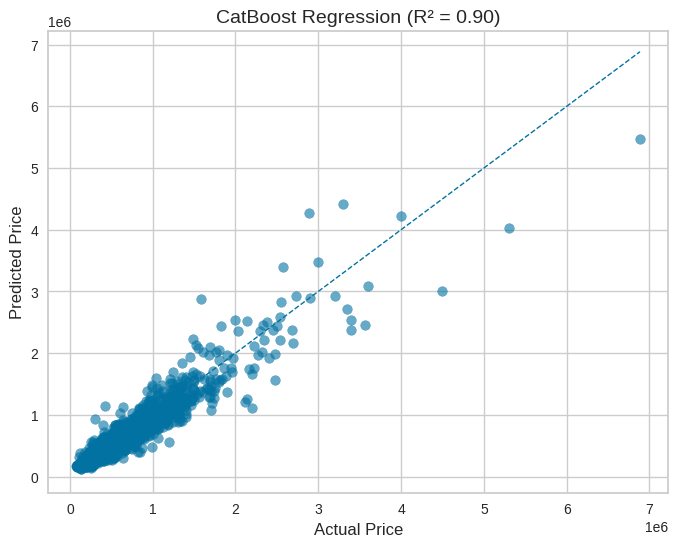

          feature  importance
13            lat   28.721641
2     sqft_living   18.324994
8           grade   14.214100
14           long   13.655734
15  sqft_living15    5.413238
9      sqft_above    4.626597
5      waterfront    3.438616
11       yr_built    2.845644
6            view    2.572683
3        sqft_lot    1.345046
16     sqft_lot15    1.163949
10  sqft_basement    1.030029
7       condition    0.822020
1       bathrooms    0.774412
12   yr_renovated    0.549747
4          floors    0.281164
0        bedrooms    0.220388


In [ ]:


!pip install catboost --quiet

from catboost import CatBoostRegressor


catb = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=101,
    verbose=100
)



catb.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True
)


predictions_catb = catb.predict(X_test)


rmse_catb = np.sqrt(metrics.mean_squared_error(y_test, predictions_catb))
r2_catb   = metrics.r2_score(y_test, predictions_catb)

print('RMSE_CatBoost =', rmse_catb)
print('R2 Score_CatBoost =', r2_catb)


plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions_catb, alpha=0.6)
min_val = min(y_test.min(), predictions_catb.min())
max_val = max(y_test.max(), predictions_catb.max())
plt.plot([min_val, max_val], [min_val, max_val], '--', linewidth=1)
plt.xlabel('Actual Price',    fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title(f'CatBoost Regression (R² = {r2_catb:.2f})', fontsize=14)
plt.grid(True)
plt.show()


import pandas as pd

feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': catb.get_feature_importance()
}).sort_values('importance', ascending=False)

print(feat_imp)
